# Fetch data

In [14]:
from warnings import filterwarnings
filterwarnings("ignore")

In [15]:
import pandas as pd
train=pd.read_csv("/Users/Sai/Desktop/dataset/training_set.csv")

In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Drop  unnecessary columns

In [17]:
for i in train.columns:
    print(i,len(train[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

# Find and replace missing data


In [18]:
from preprocessing_6PM import replacer
replacer(train)

# Define X and Y

In [19]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
Y = train[["SalePrice"]]
X = train.drop("SalePrice",axis=1)

# Seperae cat anad con

In [21]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)


# Univariate

In [22]:
import numpy as np

In [23]:
X.skew().sort_values() > 0.7

GarageYrBlt      False
YearBuilt        False
YearRemodAdd     False
GarageCars       False
Id               False
FullBath         False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
HalfBath         False
TotRmsAbvGrd     False
OverallCond      False
2ndFlrSF          True
BsmtUnfSF         True
GrLivArea         True
1stFlrSF          True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
OpenPorchSF       True
LotFrontage       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
ScreenPorch       True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
MiscVal           True
dtype: bool

In [24]:
cols_with_skew = ["2ndFlrSF","BsmtUnfSF","GrLivArea","1stFlrSF","MSSubClass","TotalBsmtSF","WoodDeckSF","BsmtFinSF1","OpenPorchSF","LotFrontage","MasVnrArea","EnclosedPorch","BsmtHalfBath","ScreenPorch","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea","MiscVal"]

In [25]:
cols_with_skew

['2ndFlrSF',
 'BsmtUnfSF',
 'GrLivArea',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'LotFrontage',
 'MasVnrArea',
 'EnclosedPorch',
 'BsmtHalfBath',
 'ScreenPorch',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'LowQualFinSF',
 '3SsnPorch',
 'LotArea',
 'PoolArea',
 'MiscVal']

# Bivariate

<AxesSubplot:>

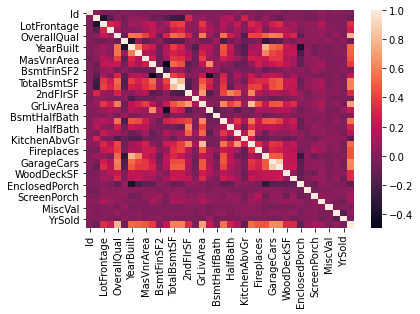

In [26]:
import seaborn as sb
sb.heatmap(train.corr())

In [27]:
imp_cols = list(train.corr()["SalePrice"].sort_values().index)[22:]
imp_cols.remove("SalePrice")

<AxesSubplot:>

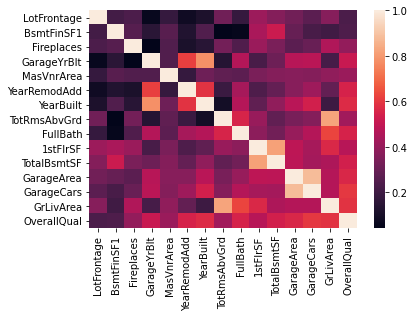

In [28]:
sb.heatmap(X[imp_cols].corr())

# Data Prepration

In [29]:
X1 = pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[imp_cols]),columns=imp_cols)
X = X2.join(X1)

# OLS Model

In [30]:
X = X.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual', 'YearRemodAdd', 'MasVnrArea'],axis=1)

In [31]:
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     55.55
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:37:09   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.406e+04
Df Residuals:                    1241   BIC:                         3.522e+04
Df Model:                         218                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.372e+04   2833.925      4.843      0.000    8164.228    1.93e+04
LotFrontage             551.3699   1095.840      0.503      0.615   -1598.533    2701.273
Fireplaces             4566.7771   1104.422      4.135      0.000    2400.037    6733.518
GarageYrBlt           -1338.2932   1529.533     -0.875      0.382   -4339.049    1662.463
YearBuilt              5356.0230   2458.653      2.178      0.030     532.446    1.02e+04
TotRmsAbvGrd           6346.8716   1485.753      4.272      0.000    3432.006    9261.737
FullBath               4095.2020   1210.227      3.384      0.001    1720.885    6469.519
1stFlrSF               1.729e+04   2237.973      7.727      0.000    1.29e+04    2.17e+04
TotalBsmtSF            7607.5200   1941.585      3.918      0.000    3798.369    1.14e+04
GarageArea             6380.4990   1884.440      3.386      0.001    2683.458    1.01e+04
GarageCars             2058.9942   1882.849      1.094      0.274   -1634.925    5752.914
MSZoning_C (all)      -3.585e+04   9180.201     -3.905      0.000   -5.39e+04   -1.78e+04
MSZoning_FV            1.846e+04   6814.411      2.708      0.007    5086.598    3.18e+04
MSZoning_RH            1.371e+04   6766.557      2.026      0.043     434.400     2.7e+04
MSZoning_RL            1.033e+04   3600.231      2.868      0.004    3263.503    1.74e+04
MSZoning_RM            7078.0789   4076.134      1.736      0.083    -918.797    1.51e+04
Street_Grvl            1119.5524   7132.924      0.157      0.875   -1.29e+04    1.51e+04
Street_Pave             1.26e+04   6559.284      1.922      0.055    -264.023    2.55e+04
Alley_Grvl             2692.6008   2983.272      0.903      0.367   -3160.213    8545.415
Alley_Pave             1.103e+04   3128.529      3.526      0.000    4893.651    1.72e+04
LotShape_IR1          -2718.3759   2978.936     -0.913      0.362   -8562.682    3125.931
LotShape_IR2           4135.9946   4271.711      0.968      0.333   -4244.580    1.25e+04
LotShape_IR3           1.394e+04   7509.811      1.856      0.064    -794.264    2.87e+04
LotShape_Reg          -1632.6417   3077.640     -0.530      0.596   -7670.595    4405.311
LandContour_Bnk         487.7527   3572.398      0.137      0.891   -6520.854    7496.359
LandContour_HLS        8468.0636   3683.420      2.299      0.022    1241.644    1.57e+04
LandContour_Low       -1693.3316   4692.856     -0.361      0.718   -1.09e+04    7513.476
LandContour_Lvl        6461.5565   2664.498      2.425      0.015    1234.137    1.17e+04
Utilities_AllPub       2.166e+04    1.4e+04      1.553      0.121   -5710.809     4.9e+04
Utilities_NoSeWa      -7937.8763   1.53e+04     -0.519      0.604   -3.79e+04    2.21e+04
LotConfig_Corner       7143.3196   3434.570      2.080      0.038     405.115    1.39e+04
LotConfig_CulDSac      

In [32]:

model.pvalues.sort_values().index

Index(['RoofMatl_ClyTile', 'Neighborhood_NoRidge', 'BsmtExposure_Gd',
       'RoofMatl_WdShngl', 'BldgType_1Fam', 'KitchenQual_Ex', '1stFlrSF',
       'Neighborhood_StoneBr', 'BsmtQual_Ex', 'Condition2_PosN',
       ...
       'Exterior2nd_AsbShng', 'Functional_Maj1', 'Exterior2nd_Other',
       'Heating_Floor', 'Condition2_Artery', 'RoofStyle_Mansard',
       'Condition1_RRNe', 'Exterior1st_AsphShn', 'PavedDrive_P',
       'HouseStyle_1.5Unf'],
      dtype='object', length=263)

In [33]:
#Q.sort_values(by="Pval")

In [36]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))
Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['Condition1_RRNe', 'Condition2_Artery', 'HouseStyle_1.5Unf',
       'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior2nd_AsbShng',
       'Exterior2nd_Other', 'Heating_Floor', 'Functional_Maj1',
       'PavedDrive_P'],
      dtype='object')

In [38]:
Q[Q.Pval > 0.9]

,Pval
Condition1_RRNe,0.961
Condition2_Artery,0.946
HouseStyle_1.5Unf,0.982
RoofStyle_Mansard,0.958
Exterior1st_AsphShn,0.974
Exterior2nd_AsbShng,0.909
Exterior2nd_Other,0.943
Heating_Floor,0.943
Functional_Maj1,0.919
PavedDrive_P,0.980


In [39]:
X = X.drop(['Condition1_RRNe', 'Condition2_Artery', 'BldgType_TwnhsE','HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'Exterior1st_AsphShn','Exterior2nd_AsbShng', 'Exterior2nd_Other', 'BsmtCond_Fa','Heating_Floor', 'Heating_OthW', 'Functional_Maj1', 'PavedDrive_P'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     56.16
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:39:18   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.405e+04
Df Residuals:                    1243   BIC:                         3.520e+04
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.344e+04   7002.825      1.919      0.055    -300.940    2.72e+04
LotFrontage             552.6885   1094.777      0.505      0.614   -1595.126    2700.503
Fireplaces             4567.7331   1103.485      4.139      0.000    2402.834    6732.632
GarageYrBlt           -1316.9919   1518.768     -0.867      0.386   -4296.624    1662.640
YearBuilt              5321.8839   2443.739      2.178      0.030     527.574    1.01e+04
TotRmsAbvGrd           6350.4585   1484.321      4.278      0.000    3438.407    9262.510
FullBath               4091.7410   1208.824      3.385      0.001    1720.181    6463.301
1stFlrSF               1.729e+04   2235.543      7.733      0.000    1.29e+04    2.17e+04
TotalBsmtSF            7621.8744   1936.502      3.936      0.000    3822.701    1.14e+04
GarageArea             6379.7854   1882.662      3.389      0.001    2686.240    1.01e+04
GarageCars             2058.2212   1880.727      1.094      0.274   -1631.528    5747.970
MSZoning_C (all)      -3.589e+04   9261.576     -3.875      0.000   -5.41e+04   -1.77e+04
MSZoning_FV            1.836e+04   6933.001      2.649      0.008    4762.093     3.2e+04
MSZoning_RH            1.365e+04   6879.177      1.984      0.047     151.243    2.71e+04
MSZoning_RL            1.026e+04   3820.957      2.686      0.007    2766.243    1.78e+04
MSZoning_RM            7057.1792   4233.790      1.667      0.096   -1248.984    1.54e+04
Street_Grvl             995.5047   7829.205      0.127      0.899   -1.44e+04    1.64e+04
Street_Pave            1.244e+04   7274.716      1.710      0.087   -1829.861    2.67e+04
Alley_Grvl             2508.2609   4417.555      0.568      0.570   -6158.426    1.12e+04
Alley_Pave             1.093e+04   4410.406      2.478      0.013    2276.798    1.96e+04
LotShape_IR1          -2795.5811   3384.985     -0.826      0.409   -9436.497    3845.335
LotShape_IR2           4062.0675   4582.231      0.886      0.376   -4927.695    1.31e+04
LotShape_IR3           1.387e+04   7645.763      1.813      0.070   -1134.709    2.89e+04
LotShape_Reg          -1694.0822   3487.798     -0.486      0.627   -8536.703    5148.539
LandContour_Bnk         405.8822   3886.417      0.104      0.917   -7218.779    8030.543
LandContour_HLS        8407.5282   4021.410      2.091      0.037     518.026    1.63e+04
LandContour_Low       -1770.6830   4957.630     -0.357      0.721   -1.15e+04    7955.565
LandContour_Lvl        6394.9944   3118.198      2.051      0.040     277.481    1.25e+04
Utilities_AllPub       2.153e+04   1.42e+04      1.517      0.129   -6307.388    4.94e+04
Utilities_NoSeWa      -8090.2347   1.57e+04     -0.515      0.607   -3.89e+04    2.27e+04
LotConfig_Corner       7065.9829   3626.272      1.949      0.052     -48.306    1.42e+04
LotConfig_CulDSac      

In [40]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['LandContour_Bnk', 'RoofStyle_Flat', 'Exterior1st_AsbShng',
       'Exterior1st_Plywood', 'Exterior1st_Stone'],
      dtype='object')

In [42]:
X = X.drop(['LandContour_Bnk', 'RoofStyle_Flat', 'Exterior1st_AsbShng','Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_MetalSd','Heating_Grav'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     58.00
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:41:12   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.404e+04
Df Residuals:                    1249   BIC:                         3.516e+04
Df Model:                         210                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.363e+04   5109.694      2.668      0.008    3609.948    2.37e+04
LotFrontage             585.6474   1089.480      0.538      0.591   -1551.766    2723.061
Fireplaces             4558.8863   1100.568      4.142      0.000    2399.720    6718.052
GarageYrBlt           -1218.0127   1507.953     -0.808      0.419   -4176.413    1740.388
YearBuilt              5213.9022   2420.228      2.154      0.031     465.742    9962.062
TotRmsAbvGrd           6288.1865   1476.783      4.258      0.000    3390.938    9185.435
FullBath               4073.2875   1203.100      3.386      0.001    1712.967    6433.608
1stFlrSF               1.738e+04   2180.995      7.967      0.000    1.31e+04    2.17e+04
TotalBsmtSF            7505.9848   1885.285      3.981      0.000    3807.311    1.12e+04
GarageArea             6353.2160   1876.028      3.387      0.001    2672.703       1e+04
GarageCars             2078.5541   1875.419      1.108      0.268   -1600.765    5757.873
MSZoning_C (all)      -3.601e+04   9184.698     -3.921      0.000    -5.4e+04    -1.8e+04
MSZoning_FV            1.851e+04   6832.966      2.708      0.007    5101.062    3.19e+04
MSZoning_RH            1.347e+04   6790.297      1.983      0.048     144.532    2.68e+04
MSZoning_RL            1.041e+04   3682.376      2.827      0.005    3185.759    1.76e+04
MSZoning_RM            7265.5159   4121.583      1.763      0.078    -820.475    1.54e+04
Street_Grvl            1055.2221   7444.666      0.142      0.887   -1.36e+04    1.57e+04
Street_Pave            1.258e+04   6839.784      1.839      0.066    -839.477     2.6e+04
Alley_Grvl             2609.6036   3586.976      0.728      0.467   -4427.559    9646.766
Alley_Pave             1.102e+04   3798.339      2.903      0.004    3573.047    1.85e+04
LotShape_IR1          -2567.8687   3150.605     -0.815      0.415   -8748.931    3613.193
LotShape_IR2           4239.6103   4384.577      0.967      0.334   -4362.339    1.28e+04
LotShape_IR3           1.341e+04   7517.194      1.784      0.075   -1337.050    2.82e+04
LotShape_Reg          -1447.9344   3242.707     -0.447      0.655   -7809.688    4913.819
LandContour_HLS        8422.8818   5802.977      1.451      0.147   -2961.777    1.98e+04
LandContour_Low       -1704.6517   7053.110     -0.242      0.809   -1.55e+04    1.21e+04
LandContour_Lvl        6318.8894   4186.621      1.509      0.131   -1894.696    1.45e+04
Utilities_AllPub       2.191e+04   1.39e+04      1.578      0.115   -5326.492    4.91e+04
Utilities_NoSeWa      -8275.0350   1.55e+04     -0.534      0.594   -3.87e+04    2.22e+04
LotConfig_Corner       7116.9737   3492.778      2.038      0.042     264.614     1.4e+04
LotConfig_CulDSac      1.618e+04   4051.417      3.993      0.000    8230.259    2.41e+04
LotConfig_FR2         -

In [43]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
E = list(Q[Q.Pval > 0.4].index)

In [44]:
X = X.drop(E,axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     83.24
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:41:55   Log-Likelihood:                -16840.
No. Observations:                1460   AIC:                         3.398e+04
Df Residuals:                    1312   BIC:                         3.476e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.081e+04    1.5e+04      0.722      0.471   -1.86e+04    4.02e+04
Fireplaces             4637.7725   1052.417      4.407      0.000    2573.169    6702.376
YearBuilt              4882.2415   1991.531      2.452      0.014     975.309    8789.174
TotRmsAbvGrd           6142.3730   1392.271      4.412      0.000    3411.053    8873.693
FullBath               4231.2016   1155.297      3.662      0.000    1964.771    6497.632
1stFlrSF               1.781e+04   1994.901      8.930      0.000    1.39e+04    2.17e+04
TotalBsmtSF            6735.0773   1546.878      4.354      0.000    3700.453    9769.702
GarageArea             6414.4612   1778.434      3.607      0.000    2925.576    9903.346
GarageCars             2200.8302   1812.934      1.214      0.225   -1355.736    5757.396
MSZoning_C (all)      -3.493e+04   8986.838     -3.886      0.000   -5.26e+04   -1.73e+04
MSZoning_FV             2.07e+04   5348.445      3.871      0.000    1.02e+04    3.12e+04
MSZoning_RH            1.101e+04   7007.310      1.571      0.116   -2737.688    2.48e+04
MSZoning_RL            9192.2507   4411.108      2.084      0.037     538.654    1.78e+04
MSZoning_RM            4836.1571   4496.552      1.076      0.282   -3985.061    1.37e+04
Street_Pave            7032.8917   1.25e+04      0.565      0.572   -1.74e+04    3.15e+04
Alley_Pave             9658.0004   5082.831      1.900      0.058    -313.365    1.96e+04
LotShape_IR2           6000.8700   4608.262      1.302      0.193   -3039.498     1.5e+04
LotShape_IR3           1.459e+04   9200.365      1.586      0.113   -3455.987    3.26e+04
LandContour_HLS        8469.8851   5092.305      1.663      0.096   -1520.065    1.85e+04
LandContour_Lvl        5708.0474   3531.117      1.616      0.106   -1219.205    1.26e+04
Utilities_AllPub       2.908e+04   2.83e+04      1.027      0.304   -2.64e+04    8.46e+04
LotConfig_Corner       1.484e+04   1.39e+04      1.066      0.286   -1.25e+04    4.21e+04
LotConfig_CulDSac      2.336e+04   1.42e+04      1.646      0.100   -4477.129    5.12e+04
LotConfig_FR2          2772.4681   1.43e+04      0.193      0.847   -2.54e+04    3.09e+04
LotConfig_Inside       1.225e+04   1.38e+04      0.886      0.376   -1.49e+04    3.94e+04
LandSlope_Mod          6745.4594   4193.942      1.608      0.108   -1482.107     1.5e+04
Neighborhood_Blmngtn  -6411.3575   7871.185     -0.815      0.415   -2.19e+04    9030.126
Neighborhood_ClearCr  -4297.9884   6391.939     -0.672      0.501   -1.68e+04    8241.550
Neighborhood_CollgCr  -3436.1024   3609.846     -0.952      0.341   -1.05e+04    3645.598
Neighborhood_Crawfor   2.491e+04   5054.263      4.928      0.000     1.5e+04    3.48e+04
Neighborhood_Edwards  -1.394e+04   3900.435     -3.573      0.000   -2.16e+04   -6284.392
Neighborhood_Gilbert  -

In [45]:
E


['LotFrontage',
 'GarageYrBlt',
 'Street_Grvl',
 'Alley_Grvl',
 'LotShape_IR1',
 'LotShape_Reg',
 'LandContour_Low',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'Condition2_RRAn',
 'BldgType_2fmCon',
 'BldgType_Twnhs',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'ExterQual_Fa',
 'ExterCond_Fa',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_BrkTil',
 'Foundation_PConc',
 'Foundation_Slab',


In [46]:
X.columns



Index(['Fireplaces', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF',
       'TotalBsmtSF', 'GarageArea', 'GarageCars', 'MSZoning_C (all)',
       'MSZoning_FV',
       ...
       'Fence_MnWw', 'MiscFeature_Gar2', 'SaleType_COD', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=154)

# Divide the data in training and testing set¶


In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)


In [48]:
x = 0.95
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 0.95 =============
Training Error:  16644.9
Testing Error:  21367.08
Overfitting
=============== 0.95005 =============
Training Error:  16644.93
Testing Error:  21367.08
Overfitting
=============== 0.9501 =============
Training Error:  16644.95
Testing Error:  21367.08
Overfitting
=============== 0.9501499999999999 =============
Training Error:  16644.97
Testing Error:  21367.08
Overfitting
=============== 0.9501999999999999 =============
Training Error:  16644.99
Testing Error:  21367.08
Overfitting
=============== 0.9502499999999999 =============
Training Error:  16645.02
Testing Error:  21367.08
Overfitting
=============== 0.9502999999999999 =============
Training Error:  16645.04
Testing Error:  21367.07
Overfitting
=============== 0.9503499999999999 =============
Training Error:  16645.06
Testing Error:  21367.07
Overfitting
=============== 0.9503999999999999 =============
Training Error:  16645.08
Testing Error:  21367.07
Overfitting
=============== 0.950449999999

In [49]:
test = pd.read_csv("/Users/Sai/Desktop/dataset/testing_set.csv")


In [50]:
replacer(test)


In [51]:
cols_keep = list(xtrain.columns)


In [52]:
cols_keep


['Fireplaces',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN'

In [53]:
cat = []
con = []
for i in test.columns:
    if(test[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [54]:
X1 = pd.DataFrame(ss.fit_transform(test[con]),columns=con)


In [55]:
X2 = pd.get_dummies(test[cat])


In [56]:
X = X1.join(X2)


In [57]:
X[cols_keep]


KeyError: "['HouseStyle_2.5Fin', 'PoolQC_Fa', 'RoofMatl_Membran', 'RoofMatl_ClyTile', 'RoofMatl_Roll', 'GarageQual_Ex', 'Condition2_RRNn', 'RoofMatl_Metal', 'Condition2_RRAe'] not in index"

In [58]:
cols_to_add = ['HouseStyle_2.5Fin', 'RoofMatl_Membran', 'Condition2_RRAe', 'PoolQC_Fa', 'GarageQual_Ex', 'Condition2_RRNn', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'RoofMatl_Metal']


In [59]:
cols_to_add


['HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'Condition2_RRAe',
 'PoolQC_Fa',
 'GarageQual_Ex',
 'Condition2_RRNn',
 'RoofMatl_Roll',
 'RoofMatl_ClyTile',
 'RoofMatl_Metal']

In [60]:
for i in cols_to_add:
    X[i]=0
 

In [61]:
final_preds = model.predict(X[cols_keep])


In [62]:
test["Predicted_sale_Price"]=final_preds


In [63]:
test.head(2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_sale_Price
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,240676.766339
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,270029.520851


In [66]:
test[["Id","Predicted_sale_Price"]].to_csv("Desktop/submission.csv")


In [67]:
pd.set_option("display.max_rows",5000)
